In [1]:
# import required libraries 
import pandas as pd

In [2]:
# load train dataset to dataframe
df_train = pd.read_csv(r'C:\Users\Supun\Desktop\Data Mining\Project\Dataset\train\train.csv')

In [3]:
# display first five rows of train dataset
df_train.head()

,id,user_id,joke_id,Rating
0,31030_110,31030,110,2.750
1,16144_109,16144,109,5.094
2,23098_6,23098,6,-6.438
3,14273_86,14273,86,4.406
4,18419_134,18419,134,9.375


In [4]:
# display shape of train dataset
df_train.shape

(1092059, 4)

In [5]:
# check for missing values in train dataset
df_train.isnull().sum()

id         0
user_id    0
joke_id    0
Rating     0
dtype: int64

In [6]:
# check is there any irrelevent data in train dataset
print('Column: user_id')
print('Minimum value: ' + str(df_train['user_id'].min()))
print('Maximum value: ' + str(df_train['user_id'].max()))
print('')
print('Column: joke_id')
print('Minimum value: ' + str(df_train['joke_id'].min()))
print('Maximum value: ' + str(df_train['joke_id'].max()))
print('')
print('Column: Rating')
print('Minimum value: ' + str(df_train['Rating'].min()))
print('Maximum value: ' + str(df_train['Rating'].max()))

Column: user_id
Minimum value: 1
Maximum value: 40863

Column: joke_id
Minimum value: 1
Maximum value: 139

Column: Rating
Minimum value: -10.0
Maximum value: 10.0


In [7]:
# check for duplicate values in train dataset
df_train.duplicated(['id']).sum()

0

<AxesSubplot: >

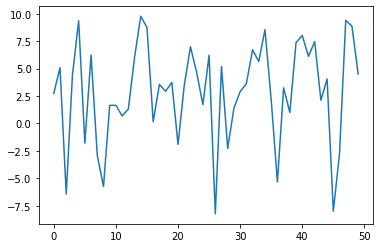

In [8]:
# display ratings of first 50 records
df_train['Rating'].head(50).plot.line()

In [9]:
# load jokes dataset to dataframe
df_jokes = pd.read_csv(r'C:\Users\Supun\Desktop\Data Mining\Project\Dataset\train\jokes.csv')

In [10]:
# display first five rows of jokes dataset
df_jokes.head()

,joke_id,joke_text
0,1,Q. What's O. J. Simpson's web address? A. Slas...
1,2,How many feminists does it take to screw in a ...
2,3,Q. Did you hear about the dyslexic devil worsh...
3,4,They asked the Japanese visitor if they have e...
4,5,Q: What did the blind person say when given so...


In [11]:
# display shape of jokes dataset
df_jokes.shape

(139, 2)

In [12]:
# checking for null values in jokes dataset
df_jokes.isnull().sum()

joke_id      0
joke_text    0
dtype: int64

In [13]:
# check is there any irrelevent data in jokes dataset
print('Column: joke_id')
print('Minimum value: ' + str(df_jokes['joke_id'].min()))
print('Maximum value: ' + str(df_jokes['joke_id'].max()))

Column: joke_id
Minimum value: 1
Maximum value: 139


In [14]:
# check for duplicate values in train dataset
df_jokes.duplicated(['joke_id']).sum()

0

In [15]:
# removal of numbers and punctuation marks from jokes
df_jokes['joke_text_letters_only'] = df_jokes['joke_text'].replace('[^a-zA-Z]', ' ', regex=True)
df_jokes.head()

,joke_id,joke_text,joke_text_letters_only
0,1,Q. What's O. J. Simpson's web address? A. Slas...,Q What s O J Simpson s web address A Slas...
1,2,How many feminists does it take to screw in a ...,How many feminists does it take to screw in a ...
2,3,Q. Did you hear about the dyslexic devil worsh...,Q Did you hear about the dyslexic devil worsh...
3,4,They asked the Japanese visitor if they have e...,They asked the Japanese visitor if they have e...
4,5,Q: What did the blind person say when given so...,Q What did the blind person say when given so...


In [16]:
# converting jokes to lowercase
df_jokes['joke_text_lowercase'] = df_jokes['joke_text_letters_only'].str.lower()
df_jokes.head()

,joke_id,joke_text,joke_text_letters_only,joke_text_lowercase
0,1,Q. What's O. J. Simpson's web address? A. Slas...,Q What s O J Simpson s web address A Slas...,q what s o j simpson s web address a slas...
1,2,How many feminists does it take to screw in a ...,How many feminists does it take to screw in a ...,how many feminists does it take to screw in a ...
2,3,Q. Did you hear about the dyslexic devil worsh...,Q Did you hear about the dyslexic devil worsh...,q did you hear about the dyslexic devil worsh...
3,4,They asked the Japanese visitor if they have e...,They asked the Japanese visitor if they have e...,they asked the japanese visitor if they have e...
4,5,Q: What did the blind person say when given so...,Q What did the blind person say when given so...,q what did the blind person say when given so...


In [17]:
# import natural language toolkit
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords

In [18]:
# removal of stop words in jokes
stop_words = stopwords.words('english')
df_jokes['joke_text_stopwords_removed'] = df_jokes['joke_text_lowercase'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df_jokes.head()

,joke_id,joke_text,joke_text_letters_only,joke_text_lowercase,joke_text_stopwords_removed
0,1,Q. What's O. J. Simpson's web address? A. Slas...,Q What s O J Simpson s web address A Slas...,q what s o j simpson s web address a slas...,q j simpson web address slash slash backslash ...
1,2,How many feminists does it take to screw in a ...,How many feminists does it take to screw in a ...,how many feminists does it take to screw in a ...,many feminists take screw light bulb funny
2,3,Q. Did you hear about the dyslexic devil worsh...,Q Did you hear about the dyslexic devil worsh...,q did you hear about the dyslexic devil worsh...,q hear dyslexic devil worshiper sold soul santa
3,4,They asked the Japanese visitor if they have e...,They asked the Japanese visitor if they have e...,they asked the japanese visitor if they have e...,asked japanese visitor elections country every...
4,5,Q: What did the blind person say when given so...,Q What did the blind person say when given so...,q what did the blind person say when given so...,q blind person say given matzah hell wrote


In [19]:
# tokenizing jokes
df_jokes['joke_text_tokenized'] = df_jokes['joke_text_stopwords_removed'].apply(lambda x: [w for w in nltk.word_tokenize(x)])
df_jokes.head()

,joke_id,joke_text,joke_text_letters_only,joke_text_lowercase,joke_text_stopwords_removed,joke_text_tokenized
0,1,Q. What's O. J. Simpson's web address? A. Slas...,Q What s O J Simpson s web address A Slas...,q what s o j simpson s web address a slas...,q j simpson web address slash slash backslash ...,"[q, j, simpson, web, address, slash, slash, ba..."
1,2,How many feminists does it take to screw in a ...,How many feminists does it take to screw in a ...,how many feminists does it take to screw in a ...,many feminists take screw light bulb funny,"[many, feminists, take, screw, light, bulb, fu..."
2,3,Q. Did you hear about the dyslexic devil worsh...,Q Did you hear about the dyslexic devil worsh...,q did you hear about the dyslexic devil worsh...,q hear dyslexic devil worshiper sold soul santa,"[q, hear, dyslexic, devil, worshiper, sold, so..."
3,4,They asked the Japanese visitor if they have e...,They asked the Japanese visitor if they have e...,they asked the japanese visitor if they have e...,asked japanese visitor elections country every...,"[asked, japanese, visitor, elections, country,..."
4,5,Q: What did the blind person say when given so...,Q What did the blind person say when given so...,q what did the blind person say when given so...,q blind person say given matzah hell wrote,"[q, blind, person, say, given, matzah, hell, w..."


In [20]:
# define function to get the POS tag of word
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [21]:
# generate POS tags of each words in tokenized jokes
df_jokes['joke_text_pos_tags'] = df_jokes['joke_text_tokenized'].apply(lambda x: list(map(get_wordnet_pos, x)))
df_jokes.head()

,joke_id,joke_text,joke_text_letters_only,joke_text_lowercase,joke_text_stopwords_removed,joke_text_tokenized,joke_text_pos_tags
0,1,Q. What's O. J. Simpson's web address? A. Slas...,Q What s O J Simpson s web address A Slas...,q what s o j simpson s web address a slas...,q j simpson web address slash slash backslash ...,"[q, j, simpson, web, address, slash, slash, ba...","[n, n, n, n, n, n, n, n, n, n, n]"
1,2,How many feminists does it take to screw in a ...,How many feminists does it take to screw in a ...,how many feminists does it take to screw in a ...,many feminists take screw light bulb funny,"[many, feminists, take, screw, light, bulb, fu...","[a, n, v, n, n, n, n]"
2,3,Q. Did you hear about the dyslexic devil worsh...,Q Did you hear about the dyslexic devil worsh...,q did you hear about the dyslexic devil worsh...,q hear dyslexic devil worshiper sold soul santa,"[q, hear, dyslexic, devil, worshiper, sold, so...","[n, n, n, n, n, v, n, n]"
3,4,They asked the Japanese visitor if they have e...,They asked the Japanese visitor if they have e...,they asked the japanese visitor if they have e...,asked japanese visitor elections country every...,"[asked, japanese, visitor, elections, country,...","[v, a, n, n, n, n, n, n]"
4,5,Q: What did the blind person say when given so...,Q What did the blind person say when given so...,q what did the blind person say when given so...,q blind person say given matzah hell wrote,"[q, blind, person, say, given, matzah, hell, w...","[n, n, n, v, v, n, n, v]"


In [22]:
# define function to lemmatize words
lemmatizer = WordNetLemmatizer()

def get_lemma(token_list, POS_tags_list):
    real_lem = []
    n = len(token_list)
    for i in range(0,n):
        real_lem.append(lemmatizer.lemmatize(token_list[i], POS_tags_list[i]))
    return real_lem

In [23]:
# lemmatize words using POS tag
df_jokes['joke_text_lemmatized'] = df_jokes.apply(lambda x: get_lemma(x.joke_text_tokenized, x.joke_text_pos_tags), axis=1)
df_jokes.head()

,joke_id,joke_text,joke_text_letters_only,joke_text_lowercase,joke_text_stopwords_removed,joke_text_tokenized,joke_text_pos_tags,joke_text_lemmatized
0,1,Q. What's O. J. Simpson's web address? A. Slas...,Q What s O J Simpson s web address A Slas...,q what s o j simpson s web address a slas...,q j simpson web address slash slash backslash ...,"[q, j, simpson, web, address, slash, slash, ba...","[n, n, n, n, n, n, n, n, n, n, n]","[q, j, simpson, web, address, slash, slash, ba..."
1,2,How many feminists does it take to screw in a ...,How many feminists does it take to screw in a ...,how many feminists does it take to screw in a ...,many feminists take screw light bulb funny,"[many, feminists, take, screw, light, bulb, fu...","[a, n, v, n, n, n, n]","[many, feminist, take, screw, light, bulb, funny]"
2,3,Q. Did you hear about the dyslexic devil worsh...,Q Did you hear about the dyslexic devil worsh...,q did you hear about the dyslexic devil worsh...,q hear dyslexic devil worshiper sold soul santa,"[q, hear, dyslexic, devil, worshiper, sold, so...","[n, n, n, n, n, v, n, n]","[q, hear, dyslexic, devil, worshiper, sell, so..."
3,4,They asked the Japanese visitor if they have e...,They asked the Japanese visitor if they have e...,they asked the japanese visitor if they have e...,asked japanese visitor elections country every...,"[asked, japanese, visitor, elections, country,...","[v, a, n, n, n, n, n, n]","[ask, japanese, visitor, election, country, ev..."
4,5,Q: What did the blind person say when given so...,Q What did the blind person say when given so...,q what did the blind person say when given so...,q blind person say given matzah hell wrote,"[q, blind, person, say, given, matzah, hell, w...","[n, n, n, v, v, n, n, v]","[q, blind, person, say, give, matzah, hell, wr..."


In [24]:
# join tokens and create processed joke text
df_jokes['joke_text_processed'] = df_jokes['joke_text_lemmatized'].apply(lambda x: ' '.join([word for word in x]))
df_jokes.head()                                                                    

,joke_id,joke_text,joke_text_letters_only,joke_text_lowercase,joke_text_stopwords_removed,joke_text_tokenized,joke_text_pos_tags,joke_text_lemmatized,joke_text_processed
0,1,Q. What's O. J. Simpson's web address? A. Slas...,Q What s O J Simpson s web address A Slas...,q what s o j simpson s web address a slas...,q j simpson web address slash slash backslash ...,"[q, j, simpson, web, address, slash, slash, ba...","[n, n, n, n, n, n, n, n, n, n, n]","[q, j, simpson, web, address, slash, slash, ba...",q j simpson web address slash slash backslash ...
1,2,How many feminists does it take to screw in a ...,How many feminists does it take to screw in a ...,how many feminists does it take to screw in a ...,many feminists take screw light bulb funny,"[many, feminists, take, screw, light, bulb, fu...","[a, n, v, n, n, n, n]","[many, feminist, take, screw, light, bulb, funny]",many feminist take screw light bulb funny
2,3,Q. Did you hear about the dyslexic devil worsh...,Q Did you hear about the dyslexic devil worsh...,q did you hear about the dyslexic devil worsh...,q hear dyslexic devil worshiper sold soul santa,"[q, hear, dyslexic, devil, worshiper, sold, so...","[n, n, n, n, n, v, n, n]","[q, hear, dyslexic, devil, worshiper, sell, so...",q hear dyslexic devil worshiper sell soul santa
3,4,They asked the Japanese visitor if they have e...,They asked the Japanese visitor if they have e...,they asked the japanese visitor if they have e...,asked japanese visitor elections country every...,"[asked, japanese, visitor, elections, country,...","[v, a, n, n, n, n, n, n]","[ask, japanese, visitor, election, country, ev...",ask japanese visitor election country every mo...
4,5,Q: What did the blind person say when given so...,Q What did the blind person say when given so...,q what did the blind person say when given so...,q blind person say given matzah hell wrote,"[q, blind, person, say, given, matzah, hell, w...","[n, n, n, v, v, n, n, v]","[q, blind, person, say, give, matzah, hell, wr...",q blind person say give matzah hell write


In [25]:
# creating processed joke dataset
df_jokes_processed = df_jokes[{'joke_id', 'joke_text_processed'}]
df_jokes_processed.head()

,joke_text_processed,joke_id
0,q j simpson web address slash slash backslash ...,1
1,many feminist take screw light bulb funny,2
2,q hear dyslexic devil worshiper sell soul santa,3
3,ask japanese visitor election country every mo...,4
4,q blind person say give matzah hell write,5


In [26]:
# display shape of processed jokes dataset
df_jokes_processed.shape

(139, 2)

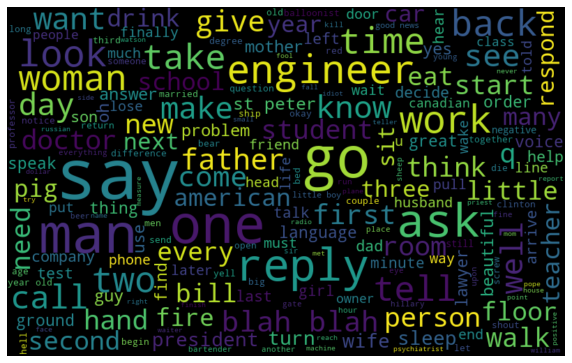

In [27]:
# generate word cloud from processed text
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words = ' '.join([text for text in df_jokes_processed['joke_text_processed']])
wordcloud = WordCloud(width=800, height=500, max_font_size=100).generate(words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
# Build a vocabulary
from collections import Counter
vocab = Counter()

In [29]:
# update vocabulary with words in processed joke
for sentence in df_jokes_processed['joke_text_processed']:
    vocab.update(sentence.split())

In [30]:
# display size of vocabulary
len(vocab)

1660

In [31]:
# display frequency of each words in vocabulary
from collections import Counter
count = Counter(vocab)
count.most_common()

[('say', 112),
 ('go', 71),
 ('man', 64),
 ('one', 60),
 ('get', 43),
 ('reply', 42),
 ('engineer', 36),
 ('work', 30),
 ('take', 29),
 ('look', 28),
 ('two', 26),
 ('back', 26),
 ('woman', 26),
 ('time', 26),
 ('call', 25),
 ('tell', 25),
 ('asks', 23),
 ('father', 23),
 ('ask', 22),
 ('room', 22),
 ('see', 20),
 ('know', 20),
 ('day', 20),
 ('blah', 20),
 ('well', 19),
 ('want', 19),
 ('make', 19),
 ('q', 18),
 ('walk', 18),
 ('little', 18),
 ('give', 17),
 ('guy', 17),
 ('floor', 17),
 ('year', 16),
 ('would', 16),
 ('come', 16),
 ('american', 15),
 ('first', 15),
 ('news', 15),
 ('person', 14),
 ('like', 14),
 ('think', 14),
 ('start', 14),
 ('hand', 14),
 ('doctor', 14),
 ('need', 13),
 ('student', 13),
 ('every', 12),
 ('bill', 12),
 ('second', 12),
 ('old', 12),
 ('read', 12),
 ('water', 12),
 ('many', 11),
 ('drink', 11),
 ('pig', 11),
 ('st', 11),
 ('school', 11),
 ('teacher', 11),
 ('eat', 11),
 ('fire', 11),
 ('screw', 10),
 ('men', 10),
 ('three', 10),
 ('difference', 10),


In [32]:
# filter out tokens used more than 20 times
tokens = [key for key in vocab if vocab[key] > 20]

In [33]:
# display length of filtered word list
len(tokens)

20

In [34]:
# display filtered word list
tokens

['take',
 'ask',
 'say',
 'one',
 'asks',
 'call',
 'two',
 'back',
 'get',
 'woman',
 'work',
 'reply',
 'engineer',
 'look',
 'go',
 'man',
 'room',
 'tell',
 'father',
 'time']

In [35]:
# vectorize processed jokes
import numpy as np

vectorized_joke_text = []
for sentence in df_jokes_processed['joke_text_processed']:
    sentences = np.zeros(len(tokens))
    for i in range(len(tokens)):
        if tokens[i] in sentence.split():
            sentences[i] = 1
    vectorized_joke_text.append(sentences)
vectorized_jokes = np.asarray(vectorized_joke_text, dtype=np.float32)
vectorized_jokes

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 1.]], dtype=float32)

In [36]:
# shape of vectorized dataset
vectorized_jokes.shape

(139, 20)

In [37]:
# convert vectorized 2D array to dataframe
vectorized_df = pd.DataFrame(vectorized_jokes)
vectorized_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# finalizing joke dataframe
vectorized_df_jokes = df_jokes_processed.drop(['joke_text_processed'], axis=1)
vectorized_df_jokes = pd.merge(vectorized_df_jokes, vectorized_df, left_index=True, right_index=True, how='outer')
vectorized_df_jokes.head()

,joke_id,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# merging train and jokes dataframes to make final dataframe
df_v1 = pd.merge(df_train, vectorized_df_jokes, on='joke_id', how='outer')
df_v1.shape

(1092059, 24)

In [40]:
# extract 10,000 samples from dataframe
df_v1 = df_v1.sample(10000, random_state=100)
df_v1.head()

,id,user_id,joke_id,Rating,0,1,2,3,4,5,...,10,11,12,13,14,15,16,17,18,19
429216,29000_66,29000,66,2.125,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
652866,34385_2,34385,2,-0.594,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
520932,29852_102,29852,102,1.938,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
784852,16845_125,16845,125,9.125,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
527899,24802_127,24802,127,2.656,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [41]:
# shape of dataframe
df_v1.shape

(10000, 24)

In [42]:
# finalizing dataframe
df = df_v1.drop(['id', 'joke_id'], axis=1)
df.head()

,user_id,Rating,0,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,19
429216,29000,2.125,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
652866,34385,-0.594,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
520932,29852,1.938,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
784852,16845,9.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
527899,24802,2.656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [43]:
# shape of final dataframe
df.shape

(10000, 22)

In [44]:
# create independent variable
X = df.drop(['Rating'], axis=1)
X.head()

,user_id,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
429216,29000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
652866,34385,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
520932,29852,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
784852,16845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
527899,24802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [45]:
# create dependent variable
y = df['Rating']
y.head()

429216    2.125
652866   -0.594
520932    1.938
784852    9.125
527899    2.656
Name: Rating, dtype: float64

In [46]:
# cross-validation to model traing 
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from numpy import sqrt, mean, absolute, std

def model_acc(model, independent_var, dependent_var):
    y_pred = []
    #define cross-validation method to use
    cv = KFold(n_splits=5, random_state=1, shuffle=True) 

    #use RMSE to evaluate model
    scores = cross_val_score(model, independent_var, dependent_var, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    
    # get the predictions of the model
    y_pred = cross_val_predict(model, independent_var, dependent_var, cv=cv, n_jobs=-1)
    
    # calculate root mean squared error and standard deviation of scores
    print(str(model)+ ' ' + 'RMSE: %.3f' % sqrt(mean(absolute(scores))) + ' ± %.2f' % std(sqrt(absolute(scores))))
    return y_pred

In [47]:
# using regression algorithms to train model

# linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
y_pred_lr = model_acc(lr, X, y)

# support vector regression
from sklearn.svm import SVR
svr = SVR()
y_pred_svr = model_acc(svr, X, y)

# decision treee regression
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
y_pred_dt = model_acc(dt, X, y)

# random forest regression
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
y_pred_rf = model_acc(rf, X, y)

# neural network regression
from sklearn.neural_network import MLPRegressor 
mlp = MLPRegressor()
y_pred_mlp = model_acc(mlp, X, y)

LinearRegression() RMSE: 5.138 ± 0.05
SVR() RMSE: 5.290 ± 0.06
DecisionTreeRegressor() RMSE: 7.182 ± 0.08
RandomForestRegressor() RMSE: 5.720 ± 0.03
MLPRegressor() RMSE: 5.387 ± 0.32


In [48]:
# create new dataframe for prediction values and exporting 
y_real = df_train['Rating'].sample(10000, random_state=100)
stat_df = pd.DataFrame({'LR_Predicted':y_pred_lr, 'SVR_Predicted':y_pred_svr, 'DT_Predicted':y_pred_dt, 'RF_Predicted':y_pred_rf, 'MLP_Predicted':y_pred_mlp, 'Real':y_real})
stat_df = stat_df.reset_index(drop=True)
stat_df.to_excel("Technique_03_Predictions.xlsx", index=False)
stat_df.head()

,LR_Predicted,SVR_Predicted,DT_Predicted,RF_Predicted,MLP_Predicted,Real
0,2.939702,2.234594,0.312,3.21117,2.360079,0.875
1,-0.293662,2.362240,-0.344,-0.16718,3.644634,-3.094
2,1.775569,2.253672,9.656,4.90106,1.521905,4.688
3,1.640285,2.232672,-1.469,-0.33200,2.061079,-5.281
4,1.482448,2.059190,1.125,-0.26288,2.759106,-0.594


In [49]:
# hyperparameter tuning
lr_tuned = LinearRegression(normalize = True)
y_pred_lr_tuned = model_acc(lr_tuned, X, y)

LinearRegression(normalize=True) RMSE: 5.138 ± 0.05


In [50]:
# hyperparameter tuning
lr_tuned = LinearRegression(fit_intercept = False)
y_pred_lr_tuned = model_acc(lr_tuned, X, y)

LinearRegression(fit_intercept=False) RMSE: 5.139 ± 0.05


In [51]:
# fitting the model
lr.fit(X,y)

LinearRegression()

In [52]:
# load test dataset to dataframe
df_test = pd.read_csv(r'C:\Users\Supun\Desktop\Data Mining\Project\Dataset\test\test.csv')
df_test.head()

,id,user_id,joke_id
0,6194_11,6194,11
1,19356_3,19356,3
2,23426_79,23426,79
3,40030_3,40030,3
4,19806_115,19806,115


In [53]:
# finalizing test dataframe
df_test_final = pd.merge(df_test, vectorized_df_jokes, on='joke_id', how='outer')
df_test_final = df_test_final.drop(['id','joke_id'], axis=1)
df_test_final.head()

,user_id,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,6194,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13494,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35167,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25066,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,25103,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# generate predicted dataset
y_pred_test = []
y_pred_test = lr.predict(df_test_final)
y_pred_test = pd.DataFrame(y_pred_test, columns =['Rating'])
y_pred_test.head()

,Rating
0,1.123088
1,1.107347
2,1.060616
3,1.082396
4,1.082316


In [55]:
# load submission dataset to dataframe
df_submission = pd.read_csv(r'C:\Users\Supun\Desktop\Data Mining\Project\Dataset\sample_submission.csv')
df_submission.head()

,id,Rating
0,6194_11,0
1,19356_3,0
2,23426_79,0
3,40030_3,0
4,19806_115,0


In [56]:
# create submission dataframe
df_submission = df_submission.drop(['Rating'], axis=1)
submit = pd.merge(df_submission, y_pred_test, left_index=True, right_index=True, how='outer')
submit.head()

,id,Rating
0,6194_11,1.123088
1,19356_3,1.107347
2,23426_79,1.060616
3,40030_3,1.082396
4,19806_115,1.082316


In [57]:
# export submission file
submit.to_csv('Technique_03_Submission.csv',index=False)